<a href="https://colab.research.google.com/github/ranggaanugrah/pemrograman-python/blob/main/Rangga%20Anugrah/1101208193/TTX44-01/Tugas%2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [328]:
import numpy as np
import matplotlib.pyplot as plt

In [329]:
NtL = lambda x: 10*np.log10(x)

In [330]:
LtN = lambda x: 10**(x/10)

In [331]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [332]:
def prx(Ptx,Pl,Gtx,Grx):

  #mengubah Ptx dari miliwat ke dBm
  Ptdb=NtL(Ptx)

  #menghitung daya terima(db)
  Prdb= Ptdb-Pl+Gtx+Grx

  #ubah daya terima ke bentuk numerik
  Prx=LtN(Prdb)

  return Prx

In [333]:
def noise(Prx,Bw):
  #B adalah bandwidth dalam hertz
  Nodb=-174+(10*np.log10(Bw))

  No=LtN(Nodb)

  SNR=Prx/No
  
  return SNR

In [334]:
def capac(SNR,Bw):

  cap=Bw*np.log2(1+SNR)

  return cap

In [335]:
f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz
loc='urban'
loc1='suburban'
loc2='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #titik
Bw=5000000 #Hz
Gtx=10 #dB
Grx=2 #dB
d=np.random.randint(dmin,dmax,N)

In [336]:
#Pathloss
LpUrban=cos(f3,loc,tower,user,d)
LpSuburban=cos(f3,loc1,tower,user,d)
LpOpen=cos(f3,loc2,tower,user,d)

#Daya Terima
PrxUrban=prx(Ptx,LpUrban,Gtx,Grx)
PrxSuburban=prx(Ptx,LpSuburban,Gtx,Grx)
PrxOpen=prx(Ptx,LpOpen,Gtx,Grx)

#SNR
SNRUrban=noise(PrxUrban,Bw)
SNRSuburban=noise(PrxSuburban,Bw)
SNROpen=noise(PrxOpen,Bw)

#Kapasitas Seluler
capUrban=capac(SNRUrban,Bw)
capSuburban=capac(SNRSuburban,Bw)
capOpen=capac(SNROpen,Bw)


In [337]:

d_sort=d[np.argsort(d)]
PrxUrban_sort=PrxUrban[np.argsort(d)]
PrxSuburban_sort=PrxSuburban[np.argsort(d)]
PrxOpen_sort=PrxOpen[np.argsort(d)]

d_sort=d[np.argsort(d)]
SNRUrban_sort=SNRUrban[np.argsort(d)]
SNRSuburban_sort=SNRSuburban[np.argsort(d)]
SNROpen_sort=SNROpen[np.argsort(d)]

d_sort=d[np.argsort(d)]
capUrban_sort=capUrban[np.argsort(d)]
capSuburban_sort=capSuburban[np.argsort(d)]
capOpen_sort=capOpen[np.argsort(d)]



# **Grafik Variasi Lokasi**

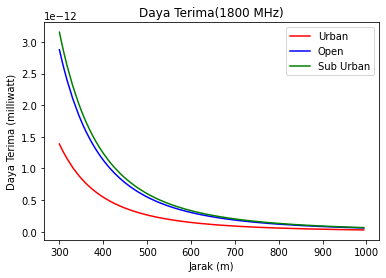

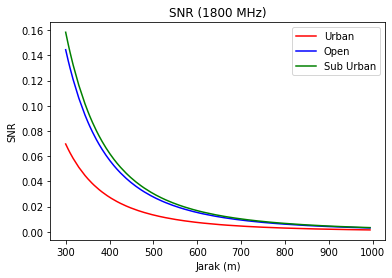

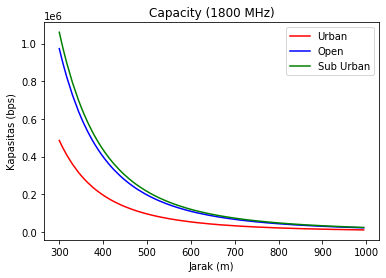

In [343]:

plt.figure()
plt.plot(d_sort,PrxUrban_sort,'r',label='Urban')
plt.plot(d_sort,PrxOpen_sort,'b',label='Open')
plt.plot(d_sort,PrxSuburban_sort,'g',label='Sub Urban')
plt.legend()
plt.title('Daya Terima(1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (milliwatt)')
plt.show()

plt.figure()
plt.plot(d_sort,SNRUrban_sort,'r',label='Urban')
plt.plot(d_sort,SNROpen_sort,'b',label='Open')
plt.plot(d_sort,SNRSuburban_sort,'g',label='Sub Urban')
plt.legend()
plt.title('SNR (1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

plt.figure()
plt.plot(d_sort,capUrban_sort,'r',label='Urban')
plt.plot(d_sort,capOpen_sort,'b',label='Open')
plt.plot(d_sort,capSuburban_sort,'g',label='Sub Urban')
plt.legend()
plt.title('Capacity (1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [339]:
#Packet Loss
LpF1=cos(f1,loc,tower,user,d)
LpF2=cos(f2,loc,tower,user,d)
LpF3=cos(f3,loc,tower,user,d)

#Daya Terima
PrxF1=prx(Ptx,LpF1,Gtx,Grx)
PrxF2=prx(Ptx,LpF2,Gtx,Grx)
PrxF3=prx(Ptx,LpF3,Gtx,Grx)

#SNR
SNRF1=noise(PrxF1,Bw)
SNRF2=noise(PrxF2,Bw)
SNRF3=noise(PrxF3,Bw)

#Kapasitas Seluler
capF1=capac(SNRF1,Bw)
capF2=capac(SNRF2,Bw)
capF3=capac(SNRF3,Bw)

In [340]:

d_sort=d[np.argsort(d)]
PrxF1_sort=PrxF1[np.argsort(d)]
PrxF2_sort=PrxF2[np.argsort(d)]
PrxF3_sort=PrxF3[np.argsort(d)]

d_sort=d[np.argsort(d)]
SNRF1_sort=SNRF1[np.argsort(d)]
SNRF2_sort=SNRF2[np.argsort(d)]
SNRF3_sort=SNRF3[np.argsort(d)]

d_sort=d[np.argsort(d)]
capF1_sort=capF1[np.argsort(d)]
capF2_sort=capF2[np.argsort(d)]
capF3_sort=capF3[np.argsort(d)]


# **Grafik Variasi Frekuensi**

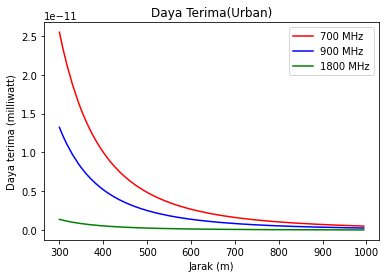

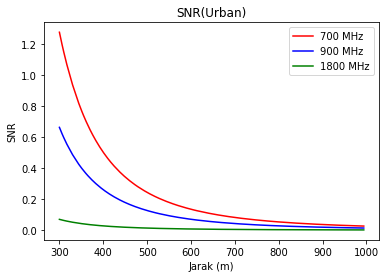

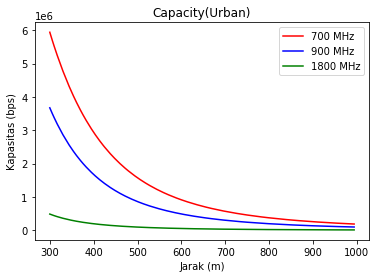

In [342]:

plt.figure()
plt.plot(d_sort,PrxF1_sort,'r',label='700 MHz')
plt.plot(d_sort,PrxF2_sort,'b',label='900 MHz')
plt.plot(d_sort,PrxF3_sort,'g',label='1800 MHz')
plt.legend()
plt.title('Daya Terima(Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya terima (milliwatt)')
plt.show()

plt.figure()
plt.plot(d_sort,SNRF1_sort,'r',label='700 MHz')
plt.plot(d_sort,SNRF2_sort,'b',label='900 MHz')
plt.plot(d_sort,SNRF3_sort,'g',label='1800 MHz')
plt.legend()
plt.title('SNR(Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

plt.figure()
plt.plot(d_sort,capF1_sort,'r',label='700 MHz')
plt.plot(d_sort,capF2_sort,'b',label='900 MHz')
plt.plot(d_sort,capF3_sort,'g',label='1800 MHz')
plt.legend()
plt.title('Capacity(Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()